In [1]:
# Data tools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import datetime

# ML tools
import numpy as np

In [47]:
business_data = pd.read_csv('building-permit-applications-data/sanfrancsicobusinesses.csv')
building_data = pd.read_csv('data/data_train.csv')
restaurant_data = pd.read_csv('building-permit-applications-data/Restaurant_Scores_-_LIVES_Standard.csv')

In [3]:
fire_data = pd.read_csv('building-permit-applications-data/Fire_Department_Calls_for_Service.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
counters = {}

In [5]:
min_date = min(pd.to_datetime(building_data['Filed Date'], format='%m/%d/%Y'))
print(min_date)

2013-01-02 00:00:00


In [6]:
permit_zipcodes = building_data.loc[building_data['Zipcode'].notna()]['Zipcode'].unique()

## Process business, restaurant inspection, and fire department call data

### Fire department

In [7]:
fire_data.shape
# fire data is very large: reduce the rows and columns

(5144933, 34)

In [8]:
fire_data.columns

Index(['Call Number', 'Unit ID', 'Incident Number', 'Call Type', 'Call Date',
       'Watch Date', 'Received DtTm', 'Entry DtTm', 'Dispatch DtTm',
       'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm',
       'Call Final Disposition', 'Available DtTm', 'Address', 'City',
       'Zipcode of Incident', 'Battalion', 'Station Area', 'Box',
       'Original Priority', 'Priority', 'Final Priority', 'ALS Unit',
       'Call Type Group', 'Number of Alarms', 'Unit Type',
       'Unit sequence in call dispatch', 'Fire Prevention District',
       'Supervisor District', 'Neighborhooods - Analysis Boundaries',
       'Location', 'RowID'],
      dtype='object')

In [11]:
# Zipcode
print("Number of unique zipcodes in the building permit dataset: ", end='')
print(len(building_data.loc[building_data['Zipcode'].notna()]['Zipcode'].unique()))

print("Number of NA zipcodes in the fire dataset: ", end='')
print(np.sum(fire_data['Zipcode of Incident'].isna()))

print("Number of unique zipcodes in the fire dataset: ", end='')
print(len(fire_data.loc[fire_data['Zipcode of Incident'].notna()]['Zipcode of Incident'].unique()))

print("Are the fire zipcodes the same as the building zipcodes? ", end='')
print(sorted(fire_data.loc[fire_data['Zipcode of Incident'].notna()]['Zipcode of Incident'].unique()) ==\
sorted(building_data.loc[building_data['Zipcode'].notna()]['Zipcode'].unique()))

Number of unique zipcodes in the building permit dataset: 27
Number of NA zipcodes in the fire dataset: 14239
Number of unique zipcodes in the fire dataset: 27
Are the fire zipcodes the same as the building zipcodes? True


In [12]:
# remove NA zipcodes
fire_data = fire_data.loc[fire_data['Zipcode of Incident'].notna()]
print(fire_data.shape)

(5130694, 34)


In [13]:
# Date
print(min(pd.to_datetime(fire_data['Call Date'], format='%m/%d/%Y')))
print(max(pd.to_datetime(fire_data['Call Date'], format='%m/%d/%Y')))

2000-04-12 00:00:00
2019-12-07 00:00:00


In [14]:
# Only include dates after the earliest date in the building permit dataset
fire_data = fire_data.loc[pd.to_datetime(fire_data['Call Date'], format='%m/%d/%Y') >= min_date]

In [15]:
print(fire_data.shape)

(2070872, 34)


In [16]:
#Transport: only for units with an ambulance
print(np.sum(fire_data['Transport DtTm'].notna()))

569129


In [17]:
fire_data.loc[:,'Transport'] = fire_data['Transport DtTm'].notna()

In [18]:
fire_data['Transport']

0          False
1          False
2          False
3          False
4          False
           ...  
5144928     True
5144929     True
5144930     True
5144931    False
5144932     True
Name: Transport, Length: 2070872, dtype: bool

In [19]:
print(np.sum(fire_data['City'] != 'San Francisco'))
print(np.sum(fire_data['City'].isna()))

388456
6070


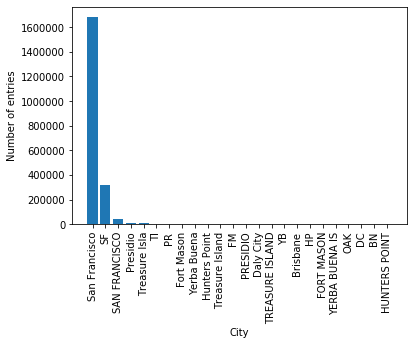

In [20]:
counters['Fire City'] = Counter(fire_data.loc[fire_data['City'].notna()]['City'])

plt.xticks(rotation='vertical')
plt.xlabel("City")
plt.ylabel("Number of entries")
plt.bar([ptype for ptype,_ in counters['Fire City'].most_common()], 
        [count for _,count in counters['Fire City'].most_common()]);

In [21]:
fire_cols_include = ['Call Date', 'Call Type Group', 'Transport', 'Zipcode of Incident', 
                     'Final Priority', 'Supervisor District', 'Neighborhooods - Analysis Boundaries']

In [22]:
fire_data = fire_data[fire_cols_include]

In [23]:
print(fire_data.shape)

(2070872, 7)


In [64]:
fire_data

,Call Date,Call Type Group,Transport,Zipcode of Incident,Final Priority,Supervisor District,Neighborhooods - Analysis Boundaries
0,07/25/2019,Alarm,False,94109.0,3,3,Nob Hill
1,07/25/2019,Alarm,False,94109.0,3,3,Nob Hill
2,07/25/2019,Alarm,False,94109.0,3,3,Nob Hill
3,07/25/2019,Alarm,False,94109.0,3,3,Nob Hill
4,07/25/2019,Alarm,False,94109.0,3,3,Nob Hill
...,...,...,...,...,...,...,...
5144928,01/30/2018,Non Life-threatening,True,94115.0,2,2,Presidio Heights
5144929,01/30/2018,Potentially Life-Threatening,True,94102.0,3,6,Tenderloin
5144930,02/01/2018,Potentially Life-Threatening,True,94117.0,2,5,Western Addition
5144931,01/29/2018,Alarm,False,94102.0,3,6,Tenderloin


In [24]:
# fire_data.to_csv(path_or_buf = 'building-permit-applications-data/fire_data.csv', index = False)

### Business data

In [25]:
print(business_data.shape)
print(business_data.columns)

(206026, 10)
Index(['Ownership Name', 'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'NAICS Code',
       'NAICS Code Description', 'Neighborhoods - Analysis Boundaries'],
      dtype='object')


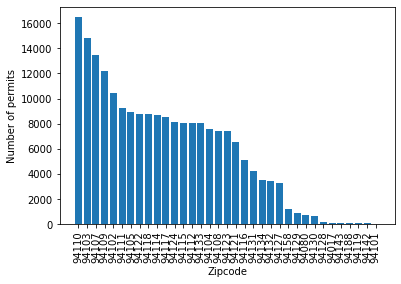

In [26]:
# Zipcodes
counters['Zipcode'] = Counter(business_data.loc[business_data['Source Zipcode'].notna()]['Source Zipcode'].values.astype('int').astype('str'))

plt.xticks(rotation='vertical')
plt.xlabel("Zipcode")
plt.ylabel("Number of permits")
plt.bar([ptype for ptype,_ in counters['Zipcode'].most_common(35)], 
        [count for _,count in counters['Zipcode'].most_common(35)]);

In [27]:
print(np.sum(business_data['Source Zipcode'].isin(permit_zipcodes)))
business_data = business_data.loc[business_data['Source Zipcode'].isin(permit_zipcodes)]

203773


In [28]:
print(len(business_data['NAICS Code'].unique()))
print(business_data['NAICS Code Description'].unique())

640
['Retail Trade' 'Financial Services' nan 'Construction'
 'Professional, Scientific, and Technical Services' 'Food Services'
 'Real Estate and Rental and Leasing Services' 'Information'
 'Accommodations' 'Transportation and Warehousing' 'Certain Services'
 'Wholesale Trade' 'Manufacturing' 'Administrative and Support Services'
 'Multiple' 'Private Education and Health Services'
 'Arts, Entertainment, and Recreation' 'Insurance' 'Utilities']


In [29]:
business_data

,Ownership Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,NAICS Code,NAICS Code Description,Neighborhoods - Analysis Boundaries
0,Diesel Usa,800 Market St,San Francisco,CA,94102.0,7/2/1997,NaN,4400-4599,Retail Trade,NaN
1,Falcon Point Capital Llc,2 Embarcadero Ctr Ste 420,San+francisco,CA,94111.0,4/1/2003,NaN,5210-5239,Financial Services,NaN
2,Leon Shannon,2299 Market St C,San Francisco,CA,94114.0,12/1/2019,NaN,NaN,NaN,Castro/Upper Market
3,North American Services Llc,One Daniel Burham 262c,San+francisco,CA,94109.0,10/1/2010,NaN,5210-5239,Financial Services,NaN
4,Altaha Ali,301 Main St #22h,San+francisco,CA,94105.0,11/23/2016,NaN,2300-2399,Construction,NaN
...,...,...,...,...,...,...,...,...,...,...
206021,Altamura Construction,3660 21st St,San Francisco,CA,94114.0,3/25/2019,NaN,2300-2399,Construction,Castro/Upper Market
206022,Folioavenue Publishing Service Gggg Yy Ppp Ltd...,2031 Union St Ste 6,San Francisco,CA,94123.0,3/20/2019,NaN,NaN,NaN,Marina
206023,Jennifer Ogriffin,150 Hooper St 102,San Francisco,CA,94107.0,3/25/2019,NaN,3100-3399 5400-5499,Multiple,Mission Bay
206024,"The Natural Shop, Inc.",4101 California St,San Francisco,CA,94118.0,4/3/2019,NaN,4400-4599,Retail Trade,Inner Richmond


In [30]:
# Date
print(min(pd.to_datetime(business_data['Business Start Date'], format='%m/%d/%Y')))
print(max(pd.to_datetime(business_data['Business Start Date'], format='%m/%d/%Y')))

print(min(pd.to_datetime(business_data.loc[business_data['Business End Date'].notna()]['Business End Date'], 
                         format='%m/%d/%Y')))
print(max(pd.to_datetime(business_data.loc[business_data['Business End Date'].notna()]['Business End Date'], 
                         format='%m/%d/%Y')))

# How many entries ended before the minimum building data date
print(np.sum(business_data['Business End Date'].notna() & 
                         (pd.to_datetime(business_data['Business End Date'], format='%m/%d/%Y') < min_date)))
# All other entries
print(np.sum(business_data['Business End Date'].isna() | \
(pd.to_datetime(business_data['Business End Date'], format='%m/%d/%Y') >= min_date)))

1849-09-01 00:00:00
2019-12-04 00:00:00
1918-09-10 00:00:00
2019-12-04 00:00:00
4297
199476


In [31]:
business_data = business_data.loc[business_data['Business End Date'].isna() | \
(pd.to_datetime(business_data['Business End Date'], format='%m/%d/%Y') >= min_date)]

In [32]:
business_cols_include = ['Source Zipcode', 'Business Start Date', 'Business End Date', 
                         'NAICS Code Description', 'Neighborhoods - Analysis Boundaries']

In [33]:
business_data = business_data[business_cols_include]

In [34]:
# business_data.to_csv(path_or_buf = 'building-permit-applications-data/business_data.csv', index = False)

### Restaurant data

In [48]:
print(restaurant_data.columns)
print(restaurant_data.shape)

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category'],
      dtype='object')
(53973, 17)


In [49]:
restaurant_data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,101192_20190606,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,92982_20170912,09/12/2017 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,101389_20190625,06/25/2019 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,85986_20161011,10/11/2016 12:00:00 AM,NaN,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,80305,Snowbird Coffee,1352 A 9th Ave,San Francisco,CA,94110,NaN,NaN,NaN,1.415596e+10,80305_20190411,04/11/2019 12:00:00 AM,94.0,Routine - Unscheduled,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,80233,Buffalo Kitchen,107 Leland Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,80233_20190417,04/17/2019 12:00:00 AM,75.0,Routine - Unscheduled,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,100216,BUNN MIKE,300 DE HARO ST,San Francisco,CA,94103,NaN,NaN,NaN,1.415530e+10,100216_20190321,03/21/2019 12:00:00 AM,84.0,Routine - Unscheduled,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,79430,City Discount Meat & Grocery Market,2298 Mission St,San Francisco,CA,94110,NaN,NaN,NaN,1.415544e+10,79430_20190418,04/18/2019 12:00:00 AM,83.0,Routine - Unscheduled,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [50]:
# Zipcodes
restaurant_data = restaurant_data.loc[restaurant_data['business_postal_code'].notna()]
print(restaurant_data.shape)

(52787, 17)


In [51]:
np.sum(restaurant_data['business_postal_code'].isin([str(int(i)) for i in permit_zipcodes]))

52552

In [52]:
restaurant_data = restaurant_data.loc[restaurant_data['business_postal_code'].isin([str(int(i)) for i in permit_zipcodes])]
print(restaurant_data.shape)

(52552, 17)


In [57]:
# Date
print(restaurant_data['inspection_date'][:10])
print(min(pd.to_datetime(restaurant_data['inspection_date'], format='%m/%d/%Y %I:%M:%S %p', errors='ignore')))
print(max(pd.to_datetime(restaurant_data['inspection_date'], format='%m/%d/%Y %I:%M:%S %p', errors='ignore')))
# Inspection data is only from 2016 onwards

1     07/25/2019 12:00:00 AM
2     09/12/2017 12:00:00 AM
3     06/25/2019 12:00:00 AM
4     10/11/2016 12:00:00 AM
5     03/21/2019 12:00:00 AM
6     02/22/2019 12:00:00 AM
7     03/27/2019 12:00:00 AM
8     04/29/2017 12:00:00 AM
9     03/25/2019 12:00:00 AM
10    07/05/2019 12:00:00 AM
Name: inspection_date, dtype: object
2016-10-04 00:00:00
2019-10-03 00:00:00


In [40]:
# Determine which columns to keep
print(restaurant_data['inspection_score'].unique())
print(restaurant_data['inspection_type'].unique())
print(restaurant_data['violation_id'].unique())
print(len(restaurant_data['violation_id'].unique()))
print(restaurant_data['violation_description'].unique())
print(len(restaurant_data['violation_description'].unique()))
print(np.sum(restaurant_data['violation_description'].notna()))
print(restaurant_data['risk_category'].unique())

[ 96.  nan  84.  94.  71.  85.  92.  68.  81.  83.  75. 100.  82.  88.
  90.  74.  87.  89.  86.  77.  91.  79.  67.  80.  93.  70.  78.  72.
  65.  69.  62.  98.  59.  54.  55.  76.  61.  73.  64.  60.  66.  57.
  63.  48.  46.  58.  51.  45.]
['Routine - Unscheduled' 'New Ownership' 'New Construction'
 'Structural Inspection' 'Reinspection/Followup'
 'New Ownership - Followup' 'Non-inspection site visit' 'Complaint'
 'Complaint Reinspection/Followup' 'Routine - Scheduled'
 'Foodborne Illness Investigation' 'Multi-agency Investigation'
 'Special Event' 'Administrative or Document Review'
 'Community Health Assessment']
['97975_20190725_103124' nan '85986_20161011_103114' ...
 '80233_20190417_103133' '100216_20190321_103119' '79430_20190418_103109']
39255
['Inadequately cleaned or sanitized food contact surfaces' nan
 'High risk vermin infestation' 'Moderate risk food holding temperature'
 'Improper storage use or identification of toxic substances'
 'Improper or defective plumbing'
 '

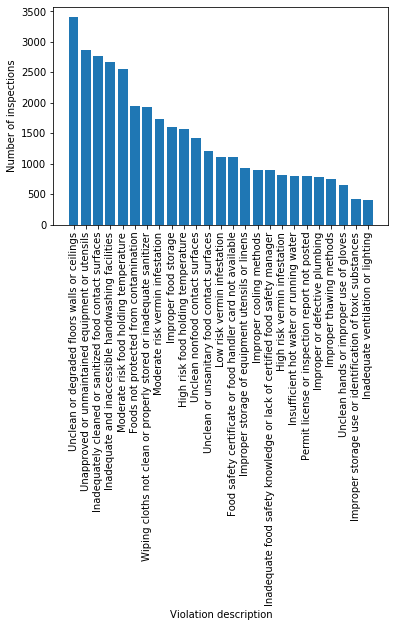

In [41]:
counters['violation_description'] = Counter(restaurant_data.loc[restaurant_data['violation_description'].notna()]['violation_description'].values)

plt.xticks(rotation='vertical')
plt.xlabel('Violation description')
plt.ylabel("Number of inspections")
plt.bar([ptype for ptype,_ in counters['violation_description'].most_common(25)], 
        [count for _,count in counters['violation_description'].most_common(25)]);

In [60]:
# A future feature transformation may include only the 25 or so most common violation descriptions
restaurant_cols_include = ['business_postal_code', 'inspection_score', 'inspection_type', 'inspection_date',
                           'violation_description', 'risk_category']

In [61]:
restaurant_data[restaurant_cols_include]

,business_postal_code,inspection_score,inspection_type,inspection_date,violation_description,risk_category
1,94118,96.0,Routine - Unscheduled,07/25/2019 12:00:00 AM,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,94110,NaN,New Ownership,09/12/2017 12:00:00 AM,NaN,NaN
3,94111,NaN,New Construction,06/25/2019 12:00:00 AM,NaN,NaN
4,94109,NaN,New Ownership,10/11/2016 12:00:00 AM,High risk vermin infestation,High Risk
5,94107,NaN,New Ownership,03/21/2019 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...
53968,94110,94.0,Routine - Unscheduled,04/11/2019 12:00:00 AM,Wiping cloths not clean or properly stored or ...,Low Risk
53969,94134,75.0,Routine - Unscheduled,04/17/2019 12:00:00 AM,Foods not protected from contamination,Moderate Risk
53970,94103,84.0,Routine - Unscheduled,03/21/2019 12:00:00 AM,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,94110,83.0,Routine - Unscheduled,04/18/2019 12:00:00 AM,Unclean or unsanitary food contact surfaces,High Risk


In [62]:
restaurant_data = restaurant_data[restaurant_cols_include]

In [63]:
# restaurant_data.to_csv(path_or_buf = 'building-permit-applications-data/restaurant_data.csv', index = False)

## Join on zipcode

In [74]:
zipcode_data = pd.DataFrame({'Zipcode' : permit_zipcodes})

### Fire data

Look at number of incidents in total and by call type group, transport, and final priority

In [78]:
print(fire_data['Call Type Group'].unique())
print(fire_data.loc[fire_data['Call Type Group'].notna()]['Call Type Group'].unique())
print(fire_data['Transport'].unique())
print(fire_data['Final Priority'].unique())

['Alarm' 'Non Life-threatening' 'Fire' 'Potentially Life-Threatening' nan]
['Alarm' 'Non Life-threatening' 'Fire' 'Potentially Life-Threatening']
[False  True]
[3 2]


In [70]:
print([np.sum(fire_data['Zipcode of Incident'] == z) for z in permit_zipcodes])
print([np.sum((fire_data['Zipcode of Incident'] == z) & (fire_data['Call Type Group'] == 'Alarm')) for z in permit_zipcodes])

[101591, 42241, 36923, 270699, 35650, 64835, 52861, 91487, 47250, 51351, 86180, 42990, 268352, 179000, 84701, 49791, 68637, 163754, 19462, 15517, 73803, 70512, 58623, 54085, 15535, 14839, 10203]
[19971, 9479, 11962, 52716, 11749, 17027, 13226, 18560, 17425, 15395, 21556, 15960, 50484, 45034, 25213, 14240, 18253, 33314, 6001, 5235, 20020, 15583, 16224, 10429, 4881, 2264, 2767]


In [75]:
zipcode_data['Fire total'] = [np.sum(fire_data['Zipcode of Incident'] == z) for z in permit_zipcodes]

In [76]:
zipcode_data

,Zipcode,Fire total
0,94124.0,101591
1,94116.0,42241
2,94111.0,36923
3,94102.0,270699
4,94131.0,35650
5,94114.0,64835
6,94121.0,52861
7,94112.0,91487
8,94108.0,47250
9,94105.0,51351


In [81]:
# Call type
for t in fire_data.loc[fire_data['Call Type Group'].notna()]['Call Type Group'].unique():
    zipcode_data['Fire Call ' + t] = [np.sum((fire_data['Zipcode of Incident'] == z) & (fire_data['Call Type Group'] == t)) for z in permit_zipcodes]

In [82]:
# Transport, final priority
zipcode_data['Fire Transport'] = [np.sum((fire_data['Zipcode of Incident'] == z) & (fire_data['Transport'])) for z in permit_zipcodes]
zipcode_data['Fire Priority 3'] = [np.sum((fire_data['Zipcode of Incident'] == z) & (fire_data['Final Priority'] == 3)) for z in permit_zipcodes]

In [83]:
zipcode_data

,Zipcode,Fire total,Fire Call Alarm,Fire Call Non Life-threatening,Fire Call Fire,Fire Call Potentially Life-Threatening,Fire Transport,Fire Priority 3
0,94124.0,101591,19971,23503,7025,50877,28556,73666
1,94116.0,42241,9479,10803,1373,20532,12053,30168
2,94111.0,36923,11962,7825,2016,15077,8502,27519
3,94102.0,270699,52716,66162,3786,147674,82822,187870
4,94131.0,35650,11749,8370,1160,14308,9180,26455
5,94114.0,64835,17027,15379,2152,30215,16387,45996
6,94121.0,52861,13226,12249,3610,23715,13315,38484
7,94112.0,91487,18560,22878,2913,47004,27510,64128
8,94108.0,47250,17425,9407,1280,19093,10563,35730
9,94105.0,51351,15395,11689,1516,22725,12104,37056


### Business data

Look at total and by NAICS code description

In [86]:
print([np.sum(business_data['Source Zipcode'] == z) for z in permit_zipcodes])
print([np.sum((business_data['Source Zipcode'] == z) & (business_data['NAICS Code Description'] == 'Food Services')) for z in permit_zipcodes])

[7904, 5006, 9124, 10192, 4127, 8496, 6366, 7856, 7329, 8811, 13240, 7236, 14573, 11873, 7905, 3310, 8309, 16117, 3184, 7480, 7854, 8582, 8585, 3373, 1165, 642, 837]
[504, 197, 421, 803, 108, 398, 293, 390, 342, 558, 920, 371, 1045, 700, 392, 234, 416, 1167, 112, 251, 685, 524, 415, 148, 191, 22, 19]


In [87]:
zipcode_data['Business total'] = [np.sum(business_data['Source Zipcode'] == z) for z in permit_zipcodes]

In [90]:
# NAICS Code Description
for d in business_data.loc[business_data['NAICS Code Description'].notna()]['NAICS Code Description'].unique():
    zipcode_data['Business NAICS ' + d] = [np.sum((business_data['Source Zipcode'] == z) & (business_data['NAICS Code Description'] == d)) for z in permit_zipcodes]

In [96]:
zipcode_data

,Zipcode,Fire total,Fire Call Alarm,Fire Call Non Life-threatening,Fire Call Fire,Fire Call Potentially Life-Threatening,Fire Transport,Fire Priority 3,Business total,Business NAICS Retail Trade,...,Business NAICS Transportation and Warehousing,Business NAICS Certain Services,Business NAICS Wholesale Trade,Business NAICS Manufacturing,Business NAICS Administrative and Support Services,Business NAICS Multiple,Business NAICS Private Education and Health Services,"Business NAICS Arts, Entertainment, and Recreation",Business NAICS Insurance,Business NAICS Utilities
0,94124.0,101591,19971,23503,7025,50877,28556,73666,7904,490,...,431,188,358,322,148,224,60,256,5,8
1,94116.0,42241,9479,10803,1373,20532,12053,30168,5006,234,...,150,104,96,23,43,98,222,219,24,7
2,94111.0,36923,11962,7825,2016,15077,8502,27519,9124,342,...,37,153,153,65,246,111,197,99,149,6
3,94102.0,270699,52716,66162,3786,147674,82822,187870,10192,664,...,167,226,85,41,188,180,629,378,13,4
4,94131.0,35650,11749,8370,1160,14308,9180,26455,4127,136,...,58,66,40,24,64,102,141,261,3,1
5,94114.0,64835,17027,15379,2152,30215,16387,45996,8496,503,...,38,135,59,22,93,177,493,397,17,0
6,94121.0,52861,13226,12249,3610,23715,13315,38484,6366,337,...,208,113,79,32,58,133,189,249,13,4
7,94112.0,91487,18560,22878,2913,47004,27510,64128,7856,519,...,284,172,128,48,113,173,181,243,22,13
8,94108.0,47250,17425,9407,1280,19093,10563,35730,7329,849,...,42,224,91,36,130,150,343,139,26,4
9,94105.0,51351,15395,11689,1516,22725,12104,37056,8811,254,...,53,156,88,38,315,129,184,134,95,10


### Restaurant data

Look at total, average inspection score, and by risk category

In [98]:
permit_zipcodes_str = [str(int(i)) for i in permit_zipcodes]
print(permit_zipcodes_str)

['94124', '94116', '94111', '94102', '94131', '94114', '94121', '94112', '94108', '94105', '94107', '94123', '94103', '94109', '94115', '94132', '94117', '94110', '94127', '94104', '94133', '94122', '94118', '94134', '94158', '94130', '94129']


In [101]:
print([np.sum(restaurant_data['business_postal_code'] == z) for z in permit_zipcodes_str])
print([np.mean(restaurant_data.loc[restaurant_data['business_postal_code'] == z]['inspection_score']) for z in permit_zipcodes_str])
print([np.sum((restaurant_data['business_postal_code'] == z) & (restaurant_data['risk_category'] == 'Low Risk')) for z in permit_zipcodes_str])

[1499, 810, 1773, 3789, 549, 1673, 1917, 2333, 2009, 2104, 2718, 1257, 4868, 3692, 2039, 1068, 1327, 5921, 596, 1138, 3325, 2158, 2633, 1004, 306, 43, 3]
[85.80611270296085, 83.56964006259781, 87.4887048192771, 86.52908067542214, 88.52463054187191, 88.45829596412555, 84.32718579234972, 84.85082547169812, 84.74825174825175, 86.03782051282052, 89.0963554667998, 86.62197802197802, 86.28100890207715, 85.68069398301957, 86.0938999314599, 89.68339768339769, 87.18415417558886, 86.00673249551167, 85.11460674157303, 86.84641638225256, 86.92304609218436, 85.32132132132132, 84.06743185078909, 83.14664804469274, 88.58646616541354, 91.44827586206897, 100.0]
[488, 305, 623, 1334, 266, 492, 680, 882, 753, 618, 720, 481, 1465, 1415, 648, 483, 542, 2189, 236, 411, 1411, 824, 957, 343, 43, 14, 0]


In [103]:
print(restaurant_data['risk_category'].unique())

['Moderate Risk' nan 'High Risk' 'Low Risk']


In [104]:
zipcode_data['Restaurant total'] = [np.sum(restaurant_data['business_postal_code'] == z) for z in permit_zipcodes_str]
zipcode_data['Restaurant inspection score'] = [np.mean(restaurant_data.loc[restaurant_data['business_postal_code'] == z]['inspection_score']) for z in permit_zipcodes_str]

# By risk
zipcode_data['Restaurant low risk'] = [np.sum((restaurant_data['business_postal_code'] == z) & (restaurant_data['risk_category'] == 'Low Risk')) for z in permit_zipcodes_str]
zipcode_data['Restaurant moderate risk'] = [np.sum((restaurant_data['business_postal_code'] == z) & (restaurant_data['risk_category'] == 'Moderate Risk')) for z in permit_zipcodes_str]
zipcode_data['Restaurant high risk'] = [np.sum((restaurant_data['business_postal_code'] == z) & (restaurant_data['risk_category'] == 'High Risk')) for z in permit_zipcodes_str]

In [105]:
zipcode_data

,Zipcode,Fire total,Fire Call Alarm,Fire Call Non Life-threatening,Fire Call Fire,Fire Call Potentially Life-Threatening,Fire Transport,Fire Priority 3,Business total,Business NAICS Retail Trade,...,Business NAICS Multiple,Business NAICS Private Education and Health Services,"Business NAICS Arts, Entertainment, and Recreation",Business NAICS Insurance,Business NAICS Utilities,Restaurant total,Restaurant inspection score,Restaurant low risk,Restaurant moderate risk,Restaurant high risk
0,94124.0,101591,19971,23503,7025,50877,28556,73666,7904,490,...,224,60,256,5,8,1499,85.806113,488,426,158
1,94116.0,42241,9479,10803,1373,20532,12053,30168,5006,234,...,98,222,219,24,7,810,83.569640,305,270,89
2,94111.0,36923,11962,7825,2016,15077,8502,27519,9124,342,...,111,197,99,149,6,1773,87.488705,623,494,193
3,94102.0,270699,52716,66162,3786,147674,82822,187870,10192,664,...,180,629,378,13,4,3789,86.529081,1334,976,376
4,94131.0,35650,11749,8370,1160,14308,9180,26455,4127,136,...,102,141,261,3,1,549,88.524631,266,133,34
5,94114.0,64835,17027,15379,2152,30215,16387,45996,8496,503,...,177,493,397,17,0,1673,88.458296,492,525,133
6,94121.0,52861,13226,12249,3610,23715,13315,38484,6366,337,...,133,189,249,13,4,1917,84.327186,680,557,256
7,94112.0,91487,18560,22878,2913,47004,27510,64128,7856,519,...,173,181,243,22,13,2333,84.850825,882,657,262
8,94108.0,47250,17425,9407,1280,19093,10563,35730,7329,849,...,150,343,139,26,4,2009,84.748252,753,588,221
9,94105.0,51351,15395,11689,1516,22725,12104,37056,8811,254,...,129,184,134,95,10,2104,86.037821,618,637,289


As it is, the zipcode data has more features than entries, so using it on its own may cause overfitting

In [106]:
zipcode_data.to_csv(path_or_buf = 'building-permit-applications-data/zipcode_data_all.csv', index = False)